In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import ast
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import jaccard_similarity_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [83]:
def recall(y_test,y_pred):
    predicted = [0 for i in range(len(labels))]
    for i in range(len(labels)):
        l = y_pred[:,i]+y_test[:,i]
        predicted[i] = (l==2).sum()/float(y_test[:,i].sum())
    d={ 'Labels': labels, 'Recall': predicted }
    return pd.DataFrame(d, columns = ['Labels', 'Recall'])

def precision(y_test,y_pred):
    actual = [0 for i in range(len(labels))]
    for i in range(len(labels)):
        l = y_pred[:,i]+y_test[:,i]
        actual[i] = (l==2).sum()/float(y_pred[:,i].sum())
    d={ 'Labels': labels, 'Precision': actual }
    return pd.DataFrame(d, columns = ['Labels', 'Precision'])

In [4]:
df = pd.read_csv('df_labels.csv')

In [5]:
cols = [col for col in df.columns.values if 'chroma' not in col]

In [6]:
df = df[cols]

In [7]:
df.track_genres = df.track_genres.apply(lambda x: ast.literal_eval(x))

In [8]:
df.head()

,track_id,track_title,artis_name,track_genres,mfcc_kurtosis,mfcc.1_kurtosis,mfcc.2_kurtosis,mfcc.3_kurtosis,mfcc.4_kurtosis,mfcc.5_kurtosis,...,tonnetz.39_std,tonnetz.40_std,tonnetz.41_std,zcr_kurtosis,zcr.1_max,zcr.2_mean,zcr.3_median,zcr.4_min,zcr.5_skew,zcr.6_std
0,10,Freeway,Kurt Vile,[Pop],5.076893,1.161854,2.095651,1.372743,-0.203574,-0.345354,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
1,20,Spiritual Level,Nicky Cook,[Experimental Pop],11.880132,4.085320,0.002655,1.518562,0.181947,0.339014,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993
2,26,Where is your Love?,Nicky Cook,[Experimental Pop],0.411345,5.013040,0.161584,-0.186142,-0.891383,0.117764,...,0.103717,0.025541,0.023846,41.645809,0.250488,0.018388,0.015625,0.000000,4.690596,0.014598
3,30,Too Happy,Nicky Cook,[Experimental Pop],1.085692,-0.689315,-0.306737,2.437467,0.663247,-0.263508,...,0.141693,0.020426,0.025418,8.166595,0.546875,0.054417,0.036133,0.002441,2.244708,0.052674
4,46,Yosemite,Nicky Cook,[Experimental Pop],2.424761,4.560640,1.627880,-0.140572,0.578725,-0.065022,...,0.132632,0.033212,0.021310,14.731083,0.223633,0.036601,0.032227,0.000000,2.848736,0.020713


In [9]:
X,y = df.iloc[:,4:],df.iloc[:,3]

In [10]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)
labels = list(mlb.classes_)
labels

['Avant-Garde',
 'Electronic',
 'Experimental',
 'Experimental Pop',
 'Folk',
 'Lo-Fi',
 'Noise',
 'Pop',
 'Rock']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
y_count = [0 for i in range(len(y[0,]))]

In [31]:
for i in range(len(y_count)):
    for j in range(len(y)):
        if sum(y[j])!=1:
            y_count[i]+=y[j,i]

In [32]:
y_count

[2371, 3171, 4285, 1904, 1119, 1794, 1793, 1354, 973]

In [33]:
y_indices_largest = np.argsort(y_count)[::-1]
y_indices_smallest = np.argsort(y_count)

In [34]:
y_random = np.arange(len(y_count))
np.random.shuffle(y_random)

In [35]:
y_indices_largest, y_indices_smallest, y_random

(array([2, 1, 0, 3, 5, 6, 7, 4, 8], dtype=int64),
 array([8, 4, 7, 6, 5, 3, 0, 1, 2], dtype=int64),
 array([7, 5, 3, 6, 0, 4, 2, 1, 8]))

# KNN

** KNN with OneVsRest **

In [17]:
KNN = OneVsRestClassifier(KNeighborsClassifier())

In [18]:
parameters = {"estimator__n_neighbors" : [10,15,20]}

In [19]:
clf = GridSearchCV(estimator=KNN, param_grid=parameters, scoring = 'f1_weighted', verbose = 2)

In [20]:
clf.fit(X_train,y_train) 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] estimator__n_neighbors=15 .......................................
[CV] ........................ estimator__n_neighbors=15, total= 4.7min
[CV] estimator__n_neighbors=15 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.6min remaining:    0.0s


[CV] ........................ estimator__n_neighbors=15, total= 4.4min
[CV] estimator__n_neighbors=15 .......................................
[CV] ........................ estimator__n_neighbors=15, total= 4.4min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 39.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          n_jobs=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__n_neighbors': [15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=2)

In [21]:
clf.best_score_,clf.best_estimator_

(0.32267574894771522,
 OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=15, p=2,
            weights='uniform'),
           n_jobs=1))

In [22]:
KNN = clf.best_estimator_

In [23]:
KNN.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'),
          n_jobs=1)

In [24]:
y_pred = KNN.predict(X_test)

In [25]:
f1_KNN_OvsR, J_KNN_OvsR = f1_score(y_test, y_pred,average='weighted'), jaccard_similarity_score(y_test,y_pred)
f1_KNN_OvsR, J_KNN_OvsR

(0.36110075776762607, 0.31523988492947291)

In [26]:
Answer_KNN_OvsR = sum(sum(y_pred))/float(len(y_pred))
Answer_KNN_OvsR

0.63836302895322938

** KNN with Classifier Chain**

In [36]:
order_options = [y_random, y_indices_largest, y_indices_smallest]

In [61]:
f1_KNN_CC = 0
for order_option in order_options:
    KNNChain = ClassifierChain(KNN, order = order_option)
    KNNChain.fit(X_train, y_train)
    y_pred = KNNChain.predict(X_test)
    print(f1_score(y_test,y_pred, average = 'weighted'), jaccard_similarity_score(y_test,y_pred))
    f1_KNN_CC = max(f1_KNN_CC, f1_score(y_test,y_pred, average = 'weighted'))
f1_KNN_CC

KeyboardInterrupt: 

In [42]:
Answer_KNN_CC = sum(sum(y_pred))/float(len(y_pred))
Answer_KNN_CC

0.65200445434298437

In [41]:
KNN_recall,KNN_precision = recall(y_test,y_pred), precision(y_test,y_pred)

# Random Forest

** RandomForest with OneVsRest**

In [43]:
RFC = OneVsRestClassifier(RandomForestClassifier())

In [44]:
#parameters = {"estimator__n_estimators" : [10,20,30,40], "estimator__max_depth" : [10,20,30,40]}
parameters = {"estimator__n_estimators" : [10], "estimator__max_depth" : [10]}

In [45]:
clf = GridSearchCV(estimator=RFC, param_grid=parameters, scoring = 'f1_weighted', verbose = 1)

In [46]:
clf.fit(X_train,y_train)    

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   32.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__max_depth': [10], 'estimator__n_estimators': [10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=1)

In [47]:
clf.best_score_,clf.best_estimator_

(0.28130646934548259,
 OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=10, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
           n_jobs=1))

In [48]:
RFC = clf.best_estimator_

In [49]:
RFC.fit(X_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

In [50]:
y_pred = RFC.predict(X_test)

In [51]:
f1_RF_OvsR = f1_score(y_test, y_pred,average='weighted')
f1_RF_OvsR

0.29260478316317212

In [52]:
Answer_RF_OvsR = sum(sum(y_pred))/float(len(y_pred))
Answer_RF_OvsR

0.4376391982182628

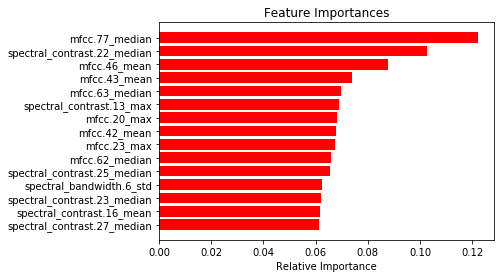

In [58]:
features = X.columns.values
importances = sum(RFC.estimators_[i].feature_importances_ for i in range(len(RFC.estimators_)))
indices = np.argsort(importances)[::-1][0:15][::-1]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices]) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

In [59]:
features[np.argsort(importances)[::-1]]

array(['mfcc.77_median', 'spectral_contrast.22_median', 'mfcc.46_mean',
       'mfcc.43_mean', 'mfcc.63_median', 'spectral_contrast.13_max',
       'mfcc.20_max', 'mfcc.42_mean', 'mfcc.23_max', 'mfcc.62_median',
       'spectral_contrast.25_median', 'spectral_bandwidth.6_std',
       'spectral_contrast.23_median', 'spectral_contrast.16_mean',
       'spectral_contrast.27_median', 'mfcc.65_median',
       'spectral_contrast.20_mean', 'rmse.6_std',
       'spectral_contrast.15_mean', 'rmse.2_mean', 'mfcc.73_median',
       'mfcc.59_mean', 'mfcc.40_mean', 'tonnetz.39_std', 'mfcc.53_mean',
       'spectral_contrast.21_median', 'mfcc.123_std', 'mfcc.60_median',
       'mfcc.66_median', 'spectral_rolloff.6_std',
       'spectral_contrast.37_skew', 'rmse.1_max',
       'spectral_contrast.14_mean', 'spectral_contrast.18_mean',
       'mfcc.25_max', 'mfcc.56_mean', 'mfcc.45_mean',
       'spectral_contrast.24_median', 'zcr.6_std', 'mfcc.50_mean',
       'mfcc.75_median', 'mfcc.76_median', 'spec

** Random Forest with Chain Classifier **

In [60]:
order_options = [y_random, y_indices_largest, y_indices_smallest]

In [68]:
f1_RF_CC = 0
for order_option in order_options:
    RFCChain = ClassifierChain(RFC, order = order_option)
    RFCChain.fit(X_train, y_train)
    y_pred = RFCChain.predict(X_test)
    print(f1_score(y_test,y_pred, average = 'weighted'), jaccard_similarity_score(y_test,y_pred))
    f1_RF_CC = max(f1_RF_CC, f1_score(y_test,y_pred, average = 'weighted'))
f1_RF_CC

(0.30186118797900235, 0.24655020415738679)
(0.29919601137270652, 0.23324981440237563)
(0.313252467268965, 0.24961024498886414)


0.313252467268965

In [48]:
sum(sum(y_pred))/float(len(y_pred))

0.55776726057906456

In [73]:
RFC_recall,RFC_precision = recall(y_test,y_pred), precision(y_test,y_pred)

# Neural Networks

**NN with One vs Rest**

In [ ]:
MLP = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(15,), random_state=1)
parameters = {'alpha': 10.0 ** -np.arange(1, 7)}


clf = GridSearchCV(estimator=MLP, param_grid=parameters, scoring = 'f1_weighted', verbose = 2)

clf.fit(X_train,y_train)
clf = clf.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [63]:
f1_NN_OvsR = f1_score(y_test, y_pred, average = 'weighted')
f1_NN_OvsR

0.41199082799575432

In [64]:
sum(sum(y_pred))/float(len(y_pred))

0.81486636971046766

**NN with Classifier Chain**

In [69]:
f1_NN_CC = 0
for order_option in order_options:
    MLPChain = ClassifierChain(clf, order = order_option)
    MLPChain.fit(X_train, y_train)
    y_pred = MLPChain.predict(X_test)
    print(f1_score(y_test,y_pred, average = 'weighted'), jaccard_similarity_score(y_test,y_pred))
    f1_NN_CC = max(f1_NN_CC, f1_score(y_test,y_pred, average = 'weighted'))
f1_NN_CC

(0.44174485608474368, 0.37077301410541941)
(0.44531116052019237, 0.37672307508749603)
(0.44066605472112075, 0.37420193021529319)


0.44531116052019237

In [84]:
NN_recall,NN_precision = recall(y_test,y_pred), precision(y_test,y_pred)

In [78]:
methods = ['KNN_OneVsRest','KNN_Chain','RF_OneVsRest','RF_Chain','NN_OneVsRest','NN_Chain']
f1_score = [f1_KNN_OvsR, f1_KNN_CC, f1_RF_OvsR, f1_RF_CC, f1_NN_OvsR, f1_NN_CC]
scores={ 'F1_score': f1_score }
pd.DataFrame(scores, index = methods, columns =  ['F1_score'])

NameError: name 'f1_KNN_OvsR' is not defined

In [86]:
recall = pd.merge(KNN_recall, RFC_recall, NN_recall, on='Labels')
recall.columns = ['Labels', 'KNN_recall' 'RFC_recall','NN_recall']
recall

TypeError: Could not compare ['left'] with block values

In [87]:
precision = pd.merge(KNN_precision, RFC_precision, NN_precision, on='Labels')
precision.columns = ['Labels', 'KNN_precision', 'RFC_precision','NN_precision']
precision

TypeError: Could not compare ['left'] with block values